In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
filepaths = [f for f in os.listdir("./rawdata") if f.endswith('.csv')]
my_name = 'Nicola Mori'

df = pd.DataFrame()

for i in filepaths:

    temp = pd.read_csv('rawdata/'+i)

    #Remove last row
    temp = temp[:-1]

    #Unified criteria for ammount column
    temp['Costo'] = pd.to_numeric(temp['Costo'])
    temp['Costo']=np.where(temp[my_name]==0, temp['Costo'], temp['Costo']/(len(temp.loc[:,'Valuta':].columns)-1))

    temp = temp.loc[:,:'Costo']

    #Append to df
    df = pd.concat([df, temp], ignore_index=True)

#Reformat df
df['Costo'] = df['Costo'].round(2)
df['Data'] = pd.to_datetime(df['Data'])
df = df[['Costo','Data','Descrizione','Categorie']]

df.head()    

,Costo,Data,Descrizione,Categorie
0,87.00,2022-03-13,Hotel Madrid,Hotel
1,9.00,2022-03-13,Taxi,Taxi
2,13.25,2022-03-13,Cena taberna,Ristorante
3,4.00,2022-03-14,Desayuno,Ristorante
4,8.20,2022-03-15,Sushi,Ristorante


In [3]:
categories = pd.read_csv('splitwise_cat.csv', sep=';')

df1 = df.merge(categories, on='Categorie', how='left')

df1 = df1.drop(['Categorie','Gruppi'], axis=1)

df1.head()

,Costo,Data,Descrizione,Categoria
0,87.00,2022-03-13,Hotel Madrid,Personali
1,9.00,2022-03-13,Taxi,Trasporto
2,13.25,2022-03-13,Cena taberna,Personali
3,4.00,2022-03-14,Desayuno,Personali
4,8.20,2022-03-15,Sushi,Personali


In [4]:
df2 = df1.groupby([df1.Data.dt.month, df1.Categoria])['Costo'].sum()

df2 = df2.unstack('Categoria')

df2['Totale'] = df2.sum(axis=1)

df2.loc['Totale'] = df2.sum(axis=0)

df2.fillna(0)

Categoria,Casa,Mangiare,Personali,Salute e carriera,Trasporto,Totale
Data,,,,,,
3,106.5,49.49,245.90,7.8,68.40,478.09
4,356.3,76.25,340.66,0.0,47.25,820.46
Totale,462.8,125.74,586.56,7.8,115.65,1298.55


In [5]:
df3 = df2.iloc[:-1,:-1]

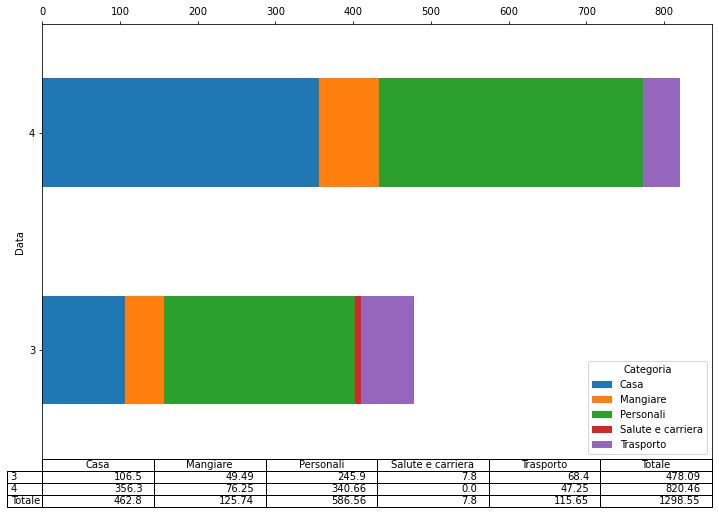

In [42]:
fig, ax = plt.subplots(1, 1)

ax.xaxis.tick_top() 

df3.plot.barh(stacked=True, figsize=(12,8), table=np.round(df2.fillna(0), 2), ax=ax)

plt.savefig(fname='expenses.png', dpi=300, facecolor='white', bbox_inches='tight')

#plt.subplots_adjust(left=0, bottom=0)



In [102]:
df1.to_excel('expenses.xlsx', index=False)